# Shortest Job First scheduling algorithm
## Pasco, Jericho C.
## Salde, Stella Marie

In [1]:
import matplotlib.pyplot as plt

In [2]:
# SJF Scheduling Function
def sjf(process_list):
    time = 0
    gantt = []
    completed = {}
    process_timeline = []

    total_waiting_time = 0
    total_turn_around_time = 0

    while process_list:
        # Filter available processes that have arrived
        available = [process for process in process_list if process[1] <= time]

        # No process available, increment time and add idle state
        if not available:
            time += 1
            gantt.append("Idle")
            continue

        # Sort available processes by burst time
        available.sort()
        process = available[0]

        # Process details
        burst_time = process[0]
        process_id = process[2]
        arrival_time = process[1]

        # Start processing the selected job
        process_start_time = time
        time += burst_time
        gantt.append(process_id)
        
        # Completion, turnaround, and waiting times
        completion_time = time
        turn_around_time = completion_time - arrival_time
        waiting_time = turn_around_time - burst_time
        process_list.remove(process)

        # Save completed process data
        completed[process_id] = [completion_time, turn_around_time, waiting_time]
        
        # Append to timeline for Gantt chart
        process_timeline.append((process_id, process_start_time, burst_time))

        total_waiting_time += waiting_time
        total_turn_around_time += turn_around_time

    # Calculate average waiting and turnaround times
    avg_waiting_time = total_waiting_time / len(completed)
    avg_turnaround_time = total_turn_around_time / len(completed)

    return gantt, completed, process_timeline, avg_waiting_time, avg_turnaround_time

In [3]:
# Gantt Chart Plotting Function
def plot_gantt_chart(process_timeline, completed):
    # Calculate total time as the completion time of the last process
    total_time = max(start + duration for _, start, duration in process_timeline)
    
    fig, ax = plt.subplots(figsize=(10, 3))
    
    for process_id, start, duration in process_timeline:
        ax.broken_barh([(start, duration)], (10, 9), facecolors=('tab:blue'), label=process_id)
        ax.text(start + duration / 2, 15, process_id, ha='center', va='center', color='white')
        
        # Add a vertical line at the completion time
        completion_time = start + duration
        ax.axvline(completion_time, color='red', linestyle='--')
        ax.text(completion_time, 20, f'{completion_time}', ha='center', va='bottom', color='red')

    ax.set_ylim(5, 25)
    ax.set_xlim(0, total_time)
    ax.set_xlabel("Time")
    ax.set_yticks([])
    ax.set_title("Gantt Chart for SJF (Non-preemptive) Scheduling with Completion Times")

    plt.show()

In [4]:
process_list = [[8, 0, "A"], [4, 3, "B"], [5, 4, "C"], [3, 6, "D"], [2, 10, "E"]]

In [5]:
gantt, completed, process_timeline, avg_waiting_time, avg_turnaround_time = sjf(process_list)

In [6]:
# Display Gantt Chart and completion details
for i in range(1, len(completed) + 1):
    gantt_display = " | ".join(gantt[:i])
    print(gantt_display)

    # Display completion times for each process up to the current one
    completion_time_display = " | ".join(
        f"{completed[process_id][0]}" for process_id in list(completed.keys())[:i]
    )
    print(completion_time_display)
    print()  # For readability

A
8

A | D
8 | 11

A | D | E
8 | 11 | 13

A | D | E | B
8 | 11 | 13 | 17

A | D | E | B | C
8 | 11 | 13 | 17 | 22



In [7]:
print("Average Waiting Time:", avg_waiting_time)
print("Average Turn Around Time:", avg_turnaround_time)

Average Waiting Time: 5.2
Average Turn Around Time: 9.6


In [8]:
print("Completed Processes with Details:")
for process_id, details in completed.items():
    print(f"Process {process_id}: Completion Time = {details[0]}, Turn Around Time = {details[1]}, Waiting Time = {details[2]}")


Completed Processes with Details:
Process A: Completion Time = 8, Turn Around Time = 8, Waiting Time = 0
Process D: Completion Time = 11, Turn Around Time = 5, Waiting Time = 2
Process E: Completion Time = 13, Turn Around Time = 3, Waiting Time = 1
Process B: Completion Time = 17, Turn Around Time = 14, Waiting Time = 10
Process C: Completion Time = 22, Turn Around Time = 18, Waiting Time = 13


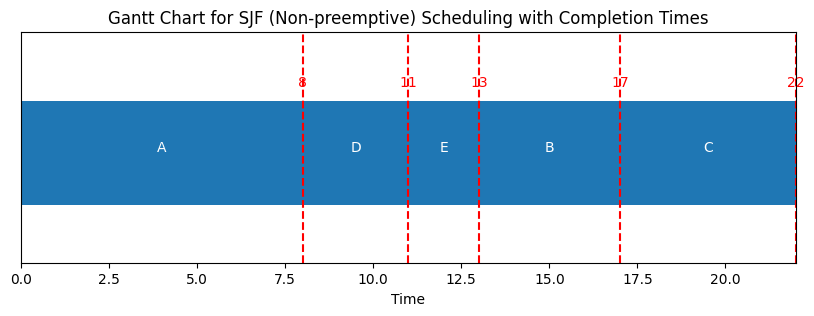

In [9]:
# Plot the Gantt chart
plot_gantt_chart(process_timeline, completed)